### Statistical analysis

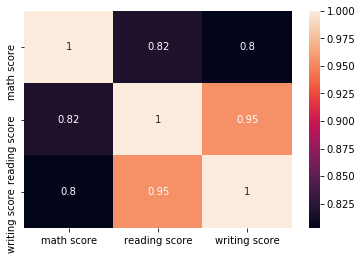

In [2]:
#%%
import matplotlib
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/exam.csv',index_col = 0)
sns.heatmap(df.corr(),annot = True)

# EDA

### (2) 기본 정보 파악하기

설문조사 : Column 147개 x Row 997개

- Column
  - 0~18 : 음악 취향 
  - 19~30 : 영화 취향
  - 31~62 : 취미/관심사
  - 63~72 : 공포증
  - 73~75 : 건강 습관
  - 76~132 : 성격, 인생관 등
  - 133~139 : 소비 습관
  - 140~146 : 기본 정보

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('data/young_survey.csv')

In [5]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


In [7]:
# 기본정보 출력
basic_info = df.iloc[:,140:]
basic_info.head()

,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,20.0,176.0,67.0,2.0,female,right,high school
3,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,20.0,170.0,59.0,1.0,female,right,high school


In [8]:
basic_info.describe()

,Age,Height,Weight,Number of siblings
count,997.000000,982.000000,981.000000,995.000000
mean,20.439318,173.610998,66.407747,1.300503
std,2.835443,9.373842,13.862403,1.015548
min,15.000000,148.000000,41.000000,0.000000
25%,19.000000,167.000000,55.000000,1.000000
50%,20.000000,173.000000,64.000000,1.000000
75%,22.000000,180.000000,75.000000,2.000000
max,30.000000,203.000000,165.000000,10.000000


In [9]:
#숫자로 되어있지 않은 놈들은 출력되지 않았다!!

In [13]:
basic_info['Gender'].value_counts()

female    587
male      405
Name: Gender, dtype: int64

In [14]:
basic_info['Handedness'].value_counts()

right    895
left      99
Name: Handedness, dtype: int64

In [15]:
basic_info['Education'].value_counts()

high school          618
bachelor's degree    207
master's degree       78
middle school         78
elementary school     10
doctorate degree       5
Name: Education, dtype: int64

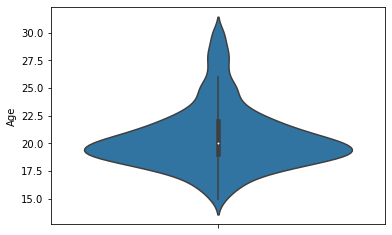

In [16]:
sns.violinplot(data=basic_info,y='Age')

In [17]:
# 10대 후반~ 20대 초반이 많이 몰려있다!

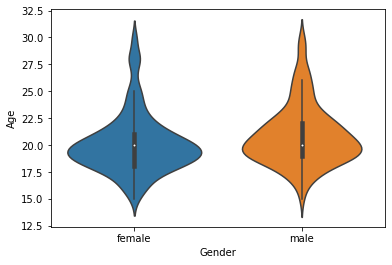

In [18]:
sns.violinplot(data=basic_info,x='Gender',y='Age')

In [19]:
# 남녀 상관 없이 10대 후반~ 20대 초반에 많이 몰려있다!

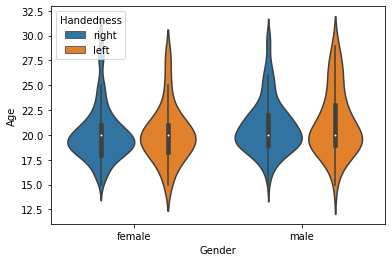

In [20]:
sns.violinplot(data=basic_info,x='Gender',y='Age',hue='Handedness')

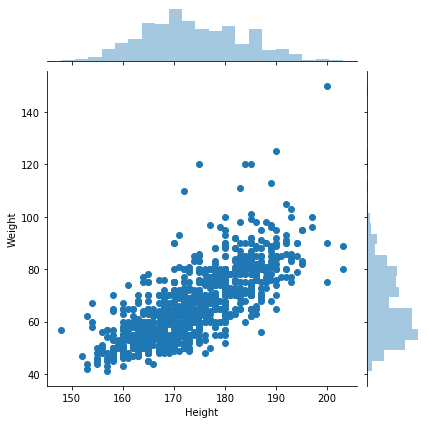

In [21]:
sns.jointplot(data=basic_info,x='Height',y='Weight')

### (3) 요즘 인기 직업은?

In [35]:
occup_df = pd.read_csv('data/occupations.csv')
occup_df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [44]:
genocc = occup_df.loc[:,'gender':'occupation']

In [61]:
x = genocc.loc[genocc['gender']=='F',:]
x['occupation'].value_counts()

student          60
administrator    36
other            36
librarian        29
educator         26
writer           19
artist           13
healthcare       11
marketing        10
homemaker         6
programmer        6
none              4
scientist         3
salesman          3
executive         3
entertainment     2
engineer          2
lawyer            2
retired           1
technician        1
Name: occupation, dtype: int64

In [63]:
y = genocc.loc[genocc['gender']=='M',:]
y['occupation'].value_counts().sort_values(ascending=False)

student          136
other             69
educator          69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
writer            26
technician        26
librarian         22
entertainment     16
marketing         16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
none               5
healthcare         5
homemaker          1
Name: occupation, dtype: int64

In [65]:
# 음익 취향
music = df.iloc[:,:18]
music.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance"
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0


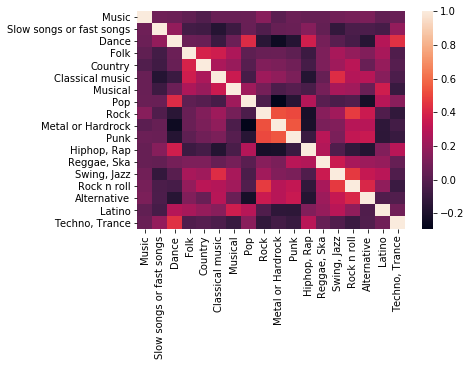

In [66]:
sns.heatmap(music.corr())

In [67]:
# 연할수록 상관관계가 높다 !

In [69]:
df.corr()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
Music,1.000000,0.075426,0.066719,0.027648,-0.014272,0.055648,0.056730,0.059967,0.149958,0.016043,...,0.093707,0.016673,0.043828,0.091142,0.014790,0.073037,-0.078058,-0.068002,-0.128233,-0.011585
Slow songs or fast songs,0.075426,1.000000,0.188217,-0.062023,-0.072138,-0.159021,-0.078479,0.054375,-0.018347,0.050913,...,0.064778,0.002680,0.106225,0.024667,0.036608,-0.027398,0.010998,0.106873,0.125870,0.002352
Dance,0.066719,0.188217,1.000000,0.065863,0.055106,-0.093125,0.067430,0.424794,-0.147867,-0.241477,...,0.189977,0.053353,0.078635,0.184652,0.078517,0.026210,0.031215,-0.012681,0.014024,0.003952
Folk,0.027648,-0.062023,0.065863,1.000000,0.391850,0.366988,0.263987,0.023641,0.056471,0.062454,...,-0.069797,-0.129808,-0.099580,-0.121036,-0.155832,-0.013442,0.132414,-0.076549,-0.013412,0.089963
Country,-0.014272,-0.072138,0.055106,0.391850,1.000000,0.257474,0.202831,0.000716,0.129917,0.115289,...,-0.071510,-0.057090,-0.065920,-0.095447,0.000729,0.007146,0.074586,0.024685,0.073452,0.035615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spending on healthy eating,0.073037,-0.027398,0.026210,-0.013442,0.007146,0.077416,0.064933,-0.025233,0.030247,-0.005333,...,0.106373,0.178066,0.148477,0.237851,0.243666,1.000000,0.015248,0.019720,0.029572,-0.082342
Age,-0.078058,0.010998,0.031215,0.132414,0.074586,0.035176,0.014553,0.020440,-0.000670,0.004109,...,-0.133800,-0.066627,-0.032284,-0.073129,-0.012082,0.015248,1.000000,0.122711,0.238893,0.089174
Height,-0.068002,0.106873,-0.012681,-0.076549,0.024685,-0.005057,-0.240144,-0.133551,-0.024931,0.116562,...,-0.136491,0.146116,0.165349,-0.089903,0.235986,0.019720,0.122711,1.000000,0.735923,-0.005442
Weight,-0.128233,0.125870,0.014024,-0.013412,0.073452,0.010132,-0.152645,-0.093742,0.007529,0.168364,...,-0.151023,0.101246,0.141377,-0.085356,0.244790,0.029572,0.238893,0.735923,1.000000,-0.026374


In [71]:
df.corr()['Age']

Music                        -0.078058
Slow songs or fast songs      0.010998
Dance                         0.031215
Folk                          0.132414
Country                       0.074586
                                ...   
Spending on healthy eating    0.015248
Age                           1.000000
Height                        0.122711
Weight                        0.238893
Number of siblings            0.089174
Name: Age, Length: 139, dtype: float64

In [76]:
df.corr()['Age'].sort_values(ascending=False)
# 나이와 가장 관계가 있는 놈들을 찾아보자!

Age                        1.000000
Weight                     0.238893
Elections                  0.212319
Prioritising workload      0.156256
Reliability                0.148141
                             ...   
Mood swings               -0.111890
Getting up                -0.119888
Questionnaires or polls   -0.128187
Shopping centres          -0.133800
Changing the past         -0.146895
Name: Age, Length: 139, dtype: float64

### (5) 시험 : 브런치 카페 음악 셀렉션

In [92]:
df = pd.read_csv('data/young_survey.csv')

In [103]:
df.corr()['Getting up'][1:19].sort_values(ascending=True)

Opera                      -0.071819
Slow songs or fast songs   -0.052613
Folk                       -0.049612
Punk                       -0.029189
Metal or Hardrock          -0.026769
Country                    -0.025315
Latino                     -0.015060
Reggae, Ska                -0.008434
Musical                     0.011869
Classical music             0.014285
Swing, Jazz                 0.019556
Techno, Trance              0.019863
Dance                       0.027249
Alternative                 0.027540
Rock n roll                 0.028889
Hiphop, Rap                 0.038980
Pop                         0.079101
Rock                        0.105245
Name: Getting up, dtype: float64

In [105]:
df.corr()['Musical instruments']['Writing']

0.34381621439042986

In [109]:
df.corr()['Spending on looks']['Branded clothing']

0.4183989446458914

In [110]:
df.corr()['Writing notes']['New environment']

-0.07939652994810564

In [111]:
df.corr()['Workaholism']['Healthy eating']

0.23864443283866651

### (7) 클러스터 분석(Cluster Analysis)

In [113]:
interests = df.loc[:,'History':'Pets']
interests.head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0


In [114]:
corr = interests.corr()
corr

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
History,1.000000,0.281493,0.400845,0.008328,0.079638,0.022010,0.027346,0.054872,0.014807,0.014117,...,-0.013262,0.064929,0.033196,-0.087338,-0.061804,0.135597,0.185301,0.024960,0.061201,0.031920
Psychology,0.281493,1.000000,0.195338,0.043030,0.065774,0.000075,-0.077712,0.087072,0.202913,0.058541,...,-0.083949,0.006261,0.042099,-0.012857,0.058210,0.060809,0.268484,0.020027,0.058522,0.053322
Politics,0.400845,0.195338,1.000000,0.104033,0.130293,0.058863,0.088846,0.304575,-0.090532,-0.058849,...,0.042173,0.069026,-0.018266,-0.023371,-0.064327,0.186743,0.085306,0.009968,0.090355,-0.055446
Mathematics,0.008328,0.043030,0.104033,1.000000,0.595188,0.157779,0.295564,0.218796,0.078043,0.181953,...,0.055701,0.083826,0.031867,-0.111193,-0.156334,0.249863,-0.018890,-0.030492,0.098004,-0.031633
Physics,0.079638,0.065774,0.130293,0.595188,1.000000,0.103793,0.339429,0.010678,0.212261,0.322827,...,0.016199,0.118929,0.047723,-0.211790,-0.227379,0.430393,0.001382,-0.029794,0.146055,-0.022982
Internet,0.022010,0.000075,0.058863,0.157779,0.103793,1.000000,0.467867,0.164447,-0.101429,-0.107657,...,0.171394,0.009498,-0.049947,0.114478,0.086552,0.190400,-0.149085,0.108927,0.072552,0.006894
PC,0.027346,-0.077712,0.088846,0.295564,0.339429,0.467867,1.000000,0.155285,-0.083648,-0.042937,...,0.080169,0.127505,-0.005789,-0.050504,-0.162955,0.420528,-0.177682,0.004907,0.154008,-0.066745
Economy Management,0.054872,0.087072,0.304575,0.218796,0.010678,0.164447,0.155285,1.000000,-0.173794,-0.180850,...,0.049986,0.071795,-0.045067,0.090132,0.111786,0.060767,-0.009515,0.066244,0.126719,-0.061738
Biology,0.014807,0.202913,-0.090532,0.078043,0.212261,-0.101429,-0.083648,-0.173794,1.000000,0.689980,...,-0.011216,0.055579,0.268927,0.012611,0.090339,0.151654,0.168296,0.013397,0.039657,0.169852
Chemistry,0.014117,0.058541,-0.058849,0.181953,0.322827,-0.107657,-0.042937,-0.180850,0.689980,1.000000,...,-0.041194,0.042481,0.200144,-0.083627,0.002447,0.195571,0.098171,-0.024690,0.035784,0.106649


In [118]:
# 관심사에 맞게 동아리를 만들려고 한다
corr['History'].sort_values(ascending=False)

History                   1.000000
Politics                  0.400845
Geography                 0.327354
Law                       0.298363
Psychology                0.281493
Reading                   0.262948
Religion                  0.203840
Art exhibitions           0.200643
Theatre                   0.185301
Writing                   0.164617
Foreign languages         0.145471
Science and technology    0.135597
Musical instruments       0.107279
Countryside, outdoors     0.096609
Physics                   0.079638
Active sport              0.064929
Adrenaline sports         0.061201
Economy Management        0.054872
Cars                      0.050644
Medicine                  0.040023
Gardening                 0.033196
Dancing                   0.032925
Pets                      0.031920
PC                        0.027346
Fun with friends          0.024960
Internet                  0.022010
Biology                   0.014807
Chemistry                 0.014117
Mathematics         

In [119]:
#이렇게 하나하나 하면 오래걸리고 정확하지도 않겠지?
#무리를 지어서 해보자!

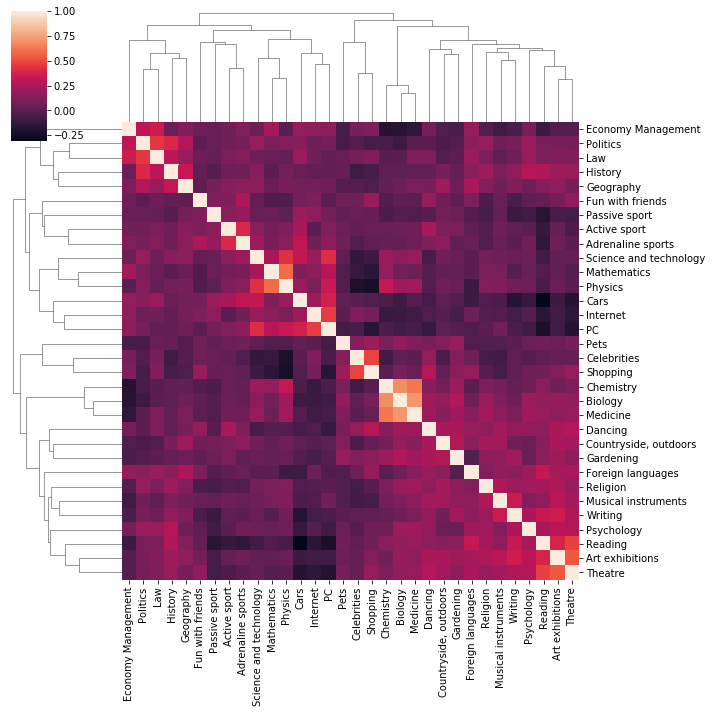

In [121]:
sns.clustermap(corr)
# 사다리들은 연관성 있는 과심사들 끼리 묶여져 있는 것이다!

### (11) 타이타닉 EDA

In [231]:
titanic_df = pd.read_csv('data/titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 내 풀이... 개망

In [144]:
# 3번
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [150]:
# 6번
titanic_df.corr()['Age']['Survived']

-0.07722109457217737

In [167]:
# 1번
x = titanic_df['Age']
Ages = [0]*9
for i in x:
    if i<10:
        Ages[0]+=1
    elif 9<i<21:
        Ages[1]+=1
    elif 19<i<30:
        Ages[2]+=1
    elif 29<i<40:
        Ages[3]+=1
    elif 39<i<50:
        Ages[4]+=1
    elif 49<i<60:
        Ages[5]+=1
    elif 59<i<70:
        Ages[6]+=1
    elif 69<i<80:
        Ages[7]+=1
    elif 79<i<90:
        Ages[8]+=1
    elif 89<i<100:
        Ages[9]+=1
print(Ages)
    

[62, 118, 204, 167, 89, 48, 19, 6, 1]


In [197]:
# 2번
x = titanic_df[['Fare','Age']]
x.sort_values(by='Fare',ascending = False)

,Fare,Age
258,512.3292,35.0
737,512.3292,35.0
679,512.3292,36.0
88,263.0000,23.0
27,263.0000,19.0
...,...,...
633,0.0000,NaN
413,0.0000,NaN
822,0.0000,38.0
732,0.0000,NaN


In [200]:
# 4번
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [221]:
xx = titanic_df[["Survived","Pclass"]]
xx

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


# 해설 풀이

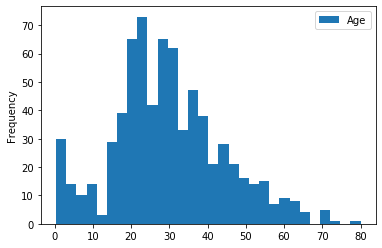

In [224]:
# 1번 : 승객 분포 파악
titanic_df.plot(kind='hist',y='Age',bins=30)

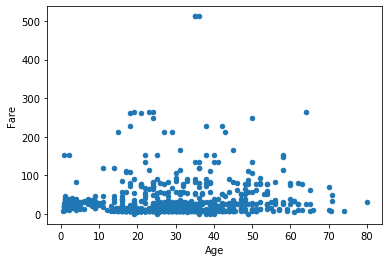

In [225]:
# 2번 : 가장 많은 요금 낸 사람은?
titanic_df.plot(kind='scatter',x='Age',y='Fare')

In [227]:
# 3번 : 생존자 수 vs. 사망자 수
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [228]:
# 4번 : 몇등실이 제일 많이 타있나?
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

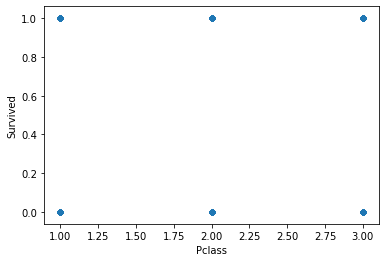

In [229]:
# 5번 : 생존율이 가장 높은 객실은?
titanic_df.plot(kind='scatter',x='Pclass',y='Survived')
#요놈은 겹쳐있어서 해석하기 힘들다

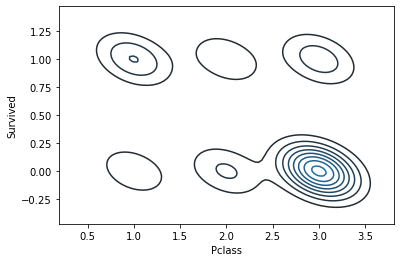

In [232]:
sns.kdeplot(titanic_df['Pclass'],titanic_df['Survived'])
# 1등실 쪽은 위쪽에 더 많이 몰려있으므로 생존률이 높다고 볼 수 있다!

In [233]:
# 6번 : 나이가 어릴수록 생존율이 높다?!

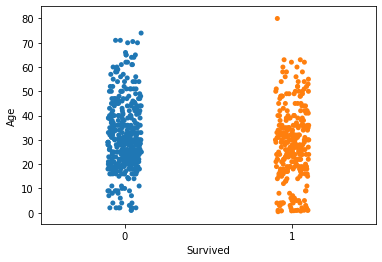

In [235]:
sns.stripplot(data=titanic_df,x="Survived",y='Age')

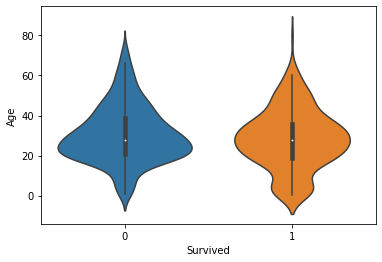

In [236]:
sns.violinplot(data=titanic_df,x="Survived",y='Age')

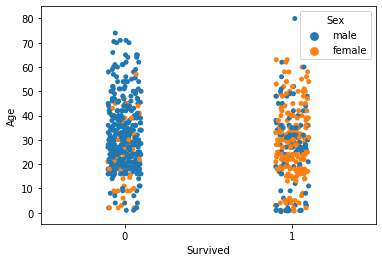

In [237]:
#7번 : 나이보다 성별이 생존율에 더 많은 영향을 미친다?
sns.stripplot(data=titanic_df,x="Survived",y="Age",hue='Sex')

In [ ]:
#나이의 분포는 비슷하지만, 성별에 따른 분포는 다른 것을 느낄 수 있음!